# <font color=#ffdd00>Exercícios</font>

<font color=#888888>Importação dos módulos</font>

In [27]:
import pandas as pd

funcionarios_df = pd.read_csv('027b CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('027b CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('027b BaseServicosPrestados.xlsx')
#display(clientes_df.head())
display(servicos_df.head())

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


<font color=#888888>1- Folha Salarial</font>

In [28]:
# limpando as tabelas
funcionarios_df = funcionarios_df.drop(['Estado Civil','Cargo'], axis=1)

In [29]:
# somando as colunas envolvidas em outra coluna
funcionarios_df['Salario Total'] = \
funcionarios_df['Salario Base'] + \
funcionarios_df['Impostos'] + \
funcionarios_df['Beneficios'] + \
funcionarios_df['VT'] + \
funcionarios_df['VR']
print('Total da Folha Salarial Total é: R$ {:,}'.format(funcionarios_df['Salario Total'].sum()))
# assim também funcionaria:
# print(sum(funcionarios_df['Salario Total']))

Total da Folha Salarial Total é: R$ 2,717,493.22


<font color=#888888>2- Faturamento da empresa</font>

In [34]:
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on='ID Cliente')
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']
print('Faturamento Total é: R$ {:,}'.format(faturamentos_df['Faturamento Total'].sum()))

Faturamento Total é: R$ 5,519,160


<font color=#888888>3- % Funcionários fecharam contrato</font>

In [39]:
q_funcionarios_total = len( funcionarios_df['ID Funcionário'] )
q_funcionarios_fecharam_contrato = len( servicos_df['ID Funcionário'].unique() )
print('Percentual que fecharam contrato: {:.2%}'.format(q_funcionarios_fecharam_contrato / q_funcionarios_total))

Percentual que fecharam contrato: 86.84%


<font color=#888888>4- Qtd de contratos por área</font>

<AxesSubplot:>

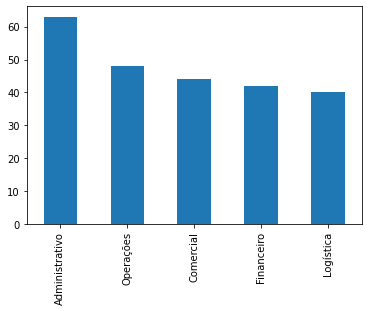

In [46]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contratos_area_q = contratos_area_df['Area'].value_counts()
contratos_area_q.plot(kind='bar')

<font color=#888888>5- Funcionários por área</font>

<AxesSubplot:>

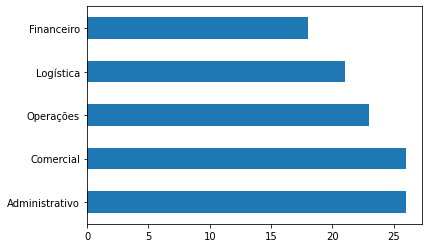

In [55]:
funcionarios_area = funcionarios_df['Area'].value_counts()
funcionarios_area.plot(kind='barh')

<font color=#888888>6- Ticket médio mensal</font>

In [57]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket médio R$ {:,.2f}'.format(ticket_medio))

Ticket médio R$ 2,502.56
